# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
spam = pd.read_csv("/content/drive/MyDrive/ToBig's/week7/spam.csv")

In [5]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
label = spam['v1']

In [7]:
label

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

## Tokenizing


In [8]:
import nltk

In [29]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#모든 알파벳을 소문자로 바꾸면서 구두점 제거
from tensorflow.keras.preprocessing.text import text_to_word_sequence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


lambda 함수를 이용해 v2의 내용들을 행 별로 토크나이징한다. 그 결과물은 spam 데이터 프레임의 또 다른 열으로 저장한다.

In [15]:
#그냥 토크나이징 진행했을 때,
spam['tokenize'] = spam['v2'].map(lambda x : [word for word in word_tokenize(x)])

In [16]:
spam

,v1,v2,tokenize
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,..."


In [17]:
#토크나이징 전 소문자로 전환, 구두점 제거 등의 전처리 진행했을 때,
spam['tokenize'] = spam['v2'].map(lambda x : [word for word in text_to_word_sequence(x)])

In [18]:
spam

,v1,v2,tokenize
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, don't, think, he, goes, to, usf, he, ..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[will, ì, b, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, was, in, mood, for, that, so, any, othe..."
5570,ham,The guy did some bitching but I acted like i'd...,"[the, guy, did, some, bitching, but, i, acted,..."


In [22]:
#소문자 전환, 구두점 제거 후, 한 문자짜리 단어는 유의미하기 어려우므로 제거해준다.
spam['tokenize'] = spam['v2'].map(lambda x : [word for word in text_to_word_sequence(x) if len(word) !=1])

In [23]:
spam

,v1,v2,tokenize
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, wkly, comp, to, win, fa, cup..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, don't, think, he, goes, to, usf, he, liv..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, co..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[will, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, was, in, mood, for, that, so, any, othe..."
5570,ham,The guy did some bitching but I acted like i'd...,"[the, guy, did, some, bitching, but, acted, li..."


a, u, 2와 같은 단어들이 사라진 것을 확인할 수 있다.

스팸메일인 경우와 아닌 경우를 따로 데이터프레임으로 저장해둔다.

In [24]:
spam_df = spam[spam['v1'] == 'spam']

In [25]:
spam_df

,v1,v2,tokenize
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, wkly, comp, to, win, fa, cup..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,"[freemsg, hey, there, darling, it's, been, wee..."
8,spam,WINNER!! As a valued network customer you have...,"[winner, as, valued, network, customer, you, h..."
9,spam,Had your mobile 11 months or more? U R entitle...,"[had, your, mobile, 11, months, or, more, enti..."
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...","[six, chances, to, win, cash, from, 100, to, 2..."
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,"[want, explicit, sex, in, 30, secs, ring, 0207..."
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,"[asked, 3mobile, if, 0870, chatlines, inclu, i..."
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,"[had, your, contract, mobile, 11, mnths, lates..."
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,"[reminder, from, o2, to, get, 50, pounds, free..."


In [26]:
ham_df = spam[spam['v1'] == 'ham']

In [27]:
ham_df

,v1,v2,tokenize
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
3,ham,U dun say so early hor... U c already then say...,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, don't, think, he, goes, to, usf, he, liv..."
6,ham,Even my brother is not like to speak with me. ...,"[even, my, brother, is, not, like, to, speak, ..."
...,...,...,...
5565,ham,Huh y lei...,"[huh, lei]"
5568,ham,Will Ì_ b going to esplanade fr home?,"[will, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, was, in, mood, for, that, so, any, othe..."
5570,ham,The guy did some bitching but I acted like i'd...,"[the, guy, did, some, bitching, but, acted, li..."


In [28]:
#총 스팸메일의 비율
747 / 5572 *100

13.406317300789663

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

### one-hot encoding 방식 이용

In [30]:
#문자를 각각 할당된 숫자로 바꿔주는 vectorizer를 이용한다.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1, ngram_range = (1,1))

In [31]:
features = vectorizer.fit_transform(spam['v2'])

dtm을 생성해본다.

In [32]:
features.todense()
dtm_np = np.array(features.todense())
feature_names = vectorizer.get_feature_names()
print(feature_names)

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
# DataFrame 생성
pd.DataFrame(data = dtm_np, columns = feature_names)

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,0207,02072069400,02073162414,02085076972,021,03,04,0430,05,050703,0578,06,07,07008009200,07046744435,07090201529,07090298926,07099833605,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07781482378,07786200117,077xxx,078,07801543489,...,yummy,yun,yunny,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,åè10,åð,åòharry,åòit,åômorrow,åôrents,ì_,ì¼1,ìä,ìï,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


spam 메일을 하나 고르고, 그 메일과 각각 메일 간의 유사도를 비교해보고자 한다. 가장 유사한 15가지 메일의 내용을 도출하고, 그 메일이 실제로 스팸인지 확인해본다.

In [34]:
#코사인 유사도를 이용해서 유사도를 계산하기로 한다.
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(dtm_np, dtm_np)

In [35]:
indices = pd.Series(spam.index, index=spam['v2'])
print(indices)

v2
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                                         0
Ok lar... Joking wif u oni...                                                                                                                                           1
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's             2
U dun say so early hor... U c already then say...                                                                                                                       3
Nah I don't think he goes to usf, he lives around here though                                                                                                           4
                                                                                                                                                   

In [36]:
#첫번째로 나타난 spam 메일인 2번째 메일을 기준으로 유사도를 확인해보자
idx = indices[2]
print(idx)

2


In [37]:
sim_scores = list(enumerate(cosine_sim[idx]))
#코사인 유사도가 가까운 순서대로 sort한다.
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

In [38]:
sim_scores = sim_scores[1:16]
data_indices = [i[0] for i in sim_scores]
print(data_indices)
spam['v2'].iloc[data_indices]

[1162, 1903, 3121, 5189, 5378, 1072, 5033, 3837, 1206, 4234, 4458, 4854, 1977, 832, 546]


1162    Free entry in 2 a wkly comp to win FA Cup fina...
1903    Free entry in 2 a weekly comp for a chance to ...
3121    Free entry in 2 a weekly comp for a chance to ...
5189    ree entry in 2 a weekly comp for a chance to w...
5378    Free entry to the gr8prizes wkly comp 4 a chan...
1072    Dear U've been invited to XCHAT. This is our f...
5033                          I want to go to perumbavoor
3837    Went to pay rent. So i had to go to the bank t...
1206    As a SIM subscriber, you are selected to recei...
4234    FREEMSG: Our records indicate you may be entit...
4458    Welcome to UK-mobile-date this msg is FREE giv...
4854                                         Same to u...
1977    Reply to win å£100 weekly! Where will the 2006...
832     Dear Voucher Holder, To claim this weeks offer...
546     I know but you need to get hotel now. I just g...
Name: v2, dtype: object

In [39]:
#가장 유사하게 나타난 15가지 메일들의 스팸 여부를 알아보자
spam['v1'].iloc[data_indices]

1162    spam
1903    spam
3121    spam
5189    spam
5378    spam
1072    spam
5033     ham
3837     ham
1206    spam
4234    spam
4458    spam
4854     ham
1977    spam
832     spam
546      ham
Name: v1, dtype: object

원핫인코딩 방식으로 임베딩 했을 때, 선정한 스팸 메일과 가장 유사한 15개의 메일 중 11개의 메일이 스팸 메일이었다.

### word2vec 방식 이용

In [40]:
import gensim
from gensim.models import Word2Vec, FastText

스팸 메일에서 가장 많이 발견되는 단어를 찾아보기 위해서 스팸메일만을 분리해놓은 spam_df를 word2vec으로 학습시켜본다.

In [41]:
spam_text = [sent for sent in spam_df['tokenize']]

In [42]:
print(list(spam_text)[0])

['free', 'entry', 'in', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', "c's", 'apply', "08452810075over18's"]


In [43]:
# word2vec 모델을 선언 iter: 학습수, min_count: 최소 단어 반복, size=임베딩벡터 차원수, window=앞뒤 단어 개수, sg: skipgram
spam_Word2Vec_model = Word2Vec(spam_text, min_count=5, size=100, window=2, iter=200, sg=1)

학습시킨 word2vec 모델을 이용하여 스팸메일에서 가장 많이 발견할 수 있는 단어를 알아내보자.

In [44]:
vocab = spam_Word2Vec_model.wv.vocab

from collections import Counter
spam_most = Counter(vocab).most_common(30)

In [45]:
print(spam_most)

[('to', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d67710>), ('call', <gensim.models.keyedvectors.Vocab object at 0x7f2a5ca84e90>), ('you', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d67a50>), ('your', <gensim.models.keyedvectors.Vocab object at 0x7f2a5cc86fd0>), ('free', <gensim.models.keyedvectors.Vocab object at 0x7f2a5ca4a050>), ('the', <gensim.models.keyedvectors.Vocab object at 0x7f2a5cc86f10>), ('for', <gensim.models.keyedvectors.Vocab object at 0x7f2a56dc2190>), ('now', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d67650>), ('or', <gensim.models.keyedvectors.Vocab object at 0x7f2a5cc86190>), ('txt', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d677d0>), ('is', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d7a750>), ('on', <gensim.models.keyedvectors.Vocab object at 0x7f2a5e127790>), ('ur', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d74dd0>), ('have', <gensim.models.keyedvectors.Vocab object at 0x7f2a579aead0>), ('from', <gensim.mod

해당 단어가 일반적으로 많이 등장하는 단어인지, 스팸메일에서만 특별히 많이 등장하는 단어인지 알아보기 위해 스팸이 아닌 메일에 대해서도 진행해본다.

In [46]:
ham_text = [sent for sent in ham_df['tokenize']]

In [47]:
ham_Word2Vec_model = Word2Vec(ham_text, min_count=5, size=100, window=2, iter=200, sg=1)

In [48]:
vocab = ham_Word2Vec_model.wv.vocab
ham_most = Counter(vocab).most_common(30)
print(ham_most)

[('you', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d6fa10>), ('to', <gensim.models.keyedvectors.Vocab object at 0x7f2a54d1f110>), ('the', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d6fc10>), ('and', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d6f490>), ('in', <gensim.models.keyedvectors.Vocab object at 0x7f2a54d1f210>), ('me', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d74210>), ('my', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d74510>), ('is', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d74410>), ('it', <gensim.models.keyedvectors.Vocab object at 0x7f2a54d296d0>), ('of', <gensim.models.keyedvectors.Vocab object at 0x7f2a54d29d50>), ('for', <gensim.models.keyedvectors.Vocab object at 0x7f2a5ca4a890>), ('that', <gensim.models.keyedvectors.Vocab object at 0x7f2a54d28050>), ('have', <gensim.models.keyedvectors.Vocab object at 0x7f2a56d6fdd0>), ('so', <gensim.models.keyedvectors.Vocab object at 0x7f2a54d1f050>), ('but', <gensim.models.ke

상위 30개의 단어를 도출해보았을때, spam_df에서는 you, your, call, mobile, free 와 같은 단어들이, ham_df에서는 my와 같이 본인을 지칭하는 단어들이 비교적 많이 등장했다.

스팸메일에서 비교적 많이 등장한 단어들이 어떤 단어와 유사도가 높게 나오는지 확인해보자.

In [49]:
spam_Word2Vec_model.most_similar(positive=["call"], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('representative', 0.4137292802333832),
 ('10p', 0.4135264754295349),
 ('between', 0.41319987177848816),
 ('3030', 0.3962545096874237),
 ('quoting', 0.392029345035553),
 ('08707509020', 0.39045000076293945),
 ('12hrs', 0.3745992183685303),
 ('line', 0.3652088940143585),
 ('freephone', 0.36275768280029297),
 ('å£400', 0.3620077073574066)]

In [50]:
spam_Word2Vec_model.most_similar(positive=["mobile"], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('phones', 0.42671605944633484),
 ('direct', 0.42114776372909546),
 ('contacted', 0.4059425890445709),
 ('colour', 0.38352319598197937),
 ('3g', 0.3753727972507477),
 ('game', 0.36951035261154175),
 ('december', 0.3652445673942566),
 ('11mths', 0.36251214146614075),
 ('member', 0.36071619391441345),
 ('no1', 0.35868507623672485)]

In [51]:
spam_Word2Vec_model.most_similar(positive=["free"], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('entry', 0.3758067190647125),
 ('sonyericsson', 0.370819628238678),
 ('08000930705', 0.35350579023361206),
 ('colour', 0.35015684366226196),
 ('anytime', 0.34619414806365967),
 ('etc', 0.3460804522037506),
 ('phones', 0.345922589302063),
 ('gr8', 0.345292329788208),
 ('rental', 0.33744877576828003),
 ('cd', 0.3372509479522705)]

위와 같은 단어가 함께 등장할 때, 스팸메일일 확률이 높다고 말할 수 있다.

### FastText 방식 이용

In [52]:
spam_Fast_model = FastText(size=100, window=2)

In [53]:
spam_Fast_model.build_vocab(spam_text)
spam_Fast_model.train(
    spam_text, epochs=200,
    total_examples=spam_Fast_model.corpus_count, total_words=spam_Fast_model.corpus_total_words
)

fast text 방식에 대해서도 스팸메일에서 많이 등장하는 call, mobile, free와 유사한 단어를 추출해보자.

In [54]:
spam_Fast_model.most_similar(positive=["call"], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('calls', 0.6169770956039429),
 ('caller', 0.5902224779129028),
 ('callså£1', 0.5728667378425598),
 ('calling', 0.5142475366592407),
 ('all', 0.4414346218109131),
 ('call2optout', 0.4286695718765259),
 ('08707509020', 0.37723273038864136),
 ('0800', 0.37300610542297363),
 ('08000839402', 0.34993258118629456),
 ('easy', 0.3366971015930176)]

In [55]:
spam_Fast_model.most_similar(positive=["mobile"], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mobiles', 0.8076920509338379),
 ('mobileupd8', 0.6591461896896362),
 ('mob', 0.6461598873138428),
 ('phones', 0.46757882833480835),
 ('direct', 0.4203168749809265),
 ('phone', 0.41306424140930176),
 ('11mths', 0.3828982710838318),
 ('access', 0.3451401889324188),
 ('services', 0.3451172113418579),
 ('game', 0.32358720898628235)]

In [56]:
spam_Fast_model.most_similar(positive=["free"], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('freemsg', 0.4389519691467285),
 ('freephone', 0.437451034784317),
 ('camcorder', 0.3889118432998657),
 ('mobileupd8', 0.36552220582962036),
 ('order', 0.35294556617736816),
 ('rply', 0.3411194682121277),
 ('spree', 0.3318538963794708),
 ('mobiles', 0.3142014145851135),
 ('latest', 0.3111419379711151),
 ('mobile', 0.30118584632873535)]

word2vec 방식으로 유사도가 높은 단어를 추출했을때와는 달리, 해당 단어와 거의 형태가 비슷한 단어들을 위주로 추출해주는 것을 볼 수 있다. (예 - calling, all ... )

따라서 정말로 유사한 의미 혹은 형태의 단어가 존재하는지 알고 싶다면 FastText 방식을, 해당 단어가 사용될 때 어떤 단어들이 가장 유사하게 함께 나타나는지를 알고 싶다면 word2vec 방식을 이용하면 좋을 것 같다고 판단할 수 있다.

지금과 같은 경우에는 spam 메일에 가장 많이 나오는 단어들과 유사하게 같이 나타나는 단어들이 궁금했던 것이므로 word2vec 방식에 목적에 더 적합하다고 말할 수 있다.

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

### 워드 클라우드

스팸 메일에 많이 포함되어 있는 단어들이 무엇인지 시각적으로 확인해보기 위해 워드클라우드를 작성해본다.

In [57]:
spam_text = spam_df['v2']
spam_text

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: v2, Length: 747, dtype: object

In [58]:
# 전처리를 위해 text들을 join해준다.
goal_text = ' '.join(spam_text)
print(goal_text)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or c

In [59]:
#re를 이용해서 문자 혹은 공백이 아닌 것들은 모두 제외하는 방식으로 전처리를 수행한다.
import re
goal_text = re.sub(r'[^\s\w]',' ',goal_text)
print(goal_text)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005  Text FA to 87121 to receive entry question std txt rate T C s apply 08452810075over18 s FreeMsg Hey there darling it s been 3 week s now and no word back  I d like some fun you up for it still  Tb ok  XxX std chgs to send  å 1 50 to rcv WINNER   As a valued network customer you have been selected to receivea å 900 prize reward  To claim call 09061701461  Claim code KL341  Valid 12 hours only  Had your mobile 11 months or more  U R entitled to Update to the latest colour mobiles with camera for Free  Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH  From 100 to 20 000 pounds txt  CSH11 and send to 87575  Cost 150p day  6days  16  TsandCs apply Reply HL 4 info URGENT  You have won a 1 week FREE membership in our å 100 000 Prize Jackpot  Txt the word  CLAIM to No  81010 T C www dbuk net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub  To use your credit  click the WAP link in the next txt message or c

In [60]:
goal_text_list = word_tokenize(goal_text)
print(goal_text_list)

['Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'T', 'C', 's', 'apply', '08452810075over18', 's', 'FreeMsg', 'Hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'I', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'to', 'send', 'å', '1', '50', 'to', 'rcv', 'WINNER', 'As', 'a', 'valued', 'network', 'customer', 'you', 'have', 'been', 'selected', 'to', 'receivea', 'å', '900', 'prize', 'reward', 'To', 'claim', 'call', '09061701461', 'Claim', 'code', 'KL341', 'Valid', '12', 'hours', 'only', 'Had', 'your', 'mobile', '11', 'months', 'or', 'more', 'U', 'R', 'entitled', 'to', 'Update', 'to', 'the', 'latest', 'colour', 'mobiles', 'with', 'camera', 'for', 'Free', 'Call', 'The', 'Mobile', 'Update', 'Co', 'FREE', 'on', '08002986030', 'SIX', 'chances

In [45]:
#stopwords = ['in','for','that', 'the','with','to'] #전치사나 지시사 등을 불용어로 처리
#for i, document in enumerate(goal_text_list):
#  clean_words = []
#  for word in goal_text_list:
#    if ((word not in stopwords) | (len(word) != 1)) : #한 글자짜리 단어는 유의미하지 않은 경우가 많으니까 제외
#      clean_words.append(word)
#  print(clean_words)
#  goal_text_list[i] = ' '.join(clean_words)

#다음과 같은 방식으로 진행할 수 있지만 코랩 상에서 ram사용량이 초과되어 포기

In [61]:
#자주 등장하는 단어들을 찾기위해 Counter를 이용한다
c = Counter(goal_text_list)
num = 100
print(c.most_common(num))

[('to', 608), ('a', 358), ('å', 299), ('2', 206), ('call', 196), ('you', 189), ('your', 187), ('or', 185), ('the', 178), ('for', 170), ('is', 149), ('now', 138), ('Call', 138), ('on', 138), ('4', 137), ('have', 128), ('and', 119), ('FREE', 117), ('from', 116), ('1', 111), ('ur', 107), ('U', 106), ('with', 102), ('mobile', 96), ('www', 96), ('of', 93), ('You', 82), ('claim', 78), ('txt', 77), ('are', 77), ('our', 76), ('in', 75), ('To', 75), ('Txt', 75), ('text', 75), ('s', 74), ('prize', 74), ('T', 72), ('Your', 72), ('150p', 70), ('u', 68), ('free', 64), ('only', 63), ('STOP', 62), ('week', 59), ('reply', 58), ('50', 57), ('cash', 57), ('contact', 56), ('I', 54), ('uk', 53), ('won', 52), ('com', 52), ('16', 51), ('out', 51), ('18', 51), ('be', 50), ('service', 50), ('send', 49), ('co', 49), ('stop', 49), ('C', 48), ('who', 48), ('Nokia', 48), ('get', 47), ('just', 47), ('per', 46), ('this', 46), ('3', 45), ('NOW', 45), ('Reply', 44), ('500', 44), ('Cs', 44), ('Free', 43), ('been', 43)

In [62]:
#워드클라우드 작성을 위해 install
! pip install wordcloud
from wordcloud import WordCloud
word_dict = dict(c.most_common(100))
print(word_dict)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
{'to': 608, 'a': 358, 'å': 299, '2': 206, 'call': 196, 'you': 189, 'your': 187, 'or': 185, 'the': 178, 'for': 170, 'is': 149, 'now': 138, 'Call': 138, 'on': 138, '4': 137, 'have': 128, 'and': 119, 'FREE': 117, 'from': 116, '1': 111, 'ur': 107, 'U': 106, 'with': 102, 'mobile': 96, 'www': 96, 'of': 93, 'You': 82, 'claim': 78, 'txt': 77, 'are': 77, 'our': 76, 'in': 75, 'To': 75, 'Txt': 75, 'text': 75, 's': 74, 'prize': 74, 'T': 72, 'Your': 72, '150p': 70, 'u': 68, 'free': 64, 'only': 63, 'STOP': 62, 'week': 59, 'reply': 58, '50': 57, 'cash': 57, 'contact': 56, 'I': 54, 'uk': 53, 'won': 52, 'com': 52, '16': 51, 'out': 51, '18': 51, 'be': 50, 'service': 50, 'send': 49, 'co': 49, 'stop': 49, 'C': 48, 'who': 48, 'Nokia': 48, 'get': 47, 'just': 47, 'per': 46, 'this': 46, '3': 45, 'NOW': 45, 'Reply': 44, '500': 44, 'Cs': 44, 'Free': 43, 'been': 43, 'Text': 42, 'new': 42, 'This': 42, 'URGENT': 41, 

In [69]:
wc = WordCloud(background_color = 'white',
               width = 3000, height = 2000,
               min_font_size = 1)
cloud = wc.generate_from_frequencies(word_dict)

(-0.5, 2999.5, 1999.5, -0.5)

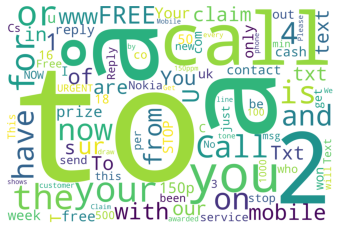

In [70]:
import matplotlib.pyplot as plt
plt.imshow(cloud)
plt.axis("off")

불용어 처리를 통해 to, a와 같은 단어를 제외했다면 더 좋은 워드클라우드 시각화가 됐을 것이다. word2vec을 통해 알아본 것과 같이 스팸메일에 your, call, mobile, FREE, now, txt와 같은 단어들이 많이 나오는 것을 알 수 있다.

### 토픽 모델링

토픽 모델링을 통해 스팸메일의 토픽이 어떤 종류가 있는지, 종류 별로 어떤 단어들이 많이 사용되는지를 알아본다.

In [71]:
from gensim.models.coherencemodel import CoherenceModel

In [72]:
spam_df['tokenize']

2       [free, entry, in, wkly, comp, to, win, fa, cup...
5       [freemsg, hey, there, darling, it's, been, wee...
8       [winner, as, valued, network, customer, you, h...
9       [had, your, mobile, 11, months, or, more, enti...
11      [six, chances, to, win, cash, from, 100, to, 2...
                              ...                        
5537    [want, explicit, sex, in, 30, secs, ring, 0207...
5540    [asked, 3mobile, if, 0870, chatlines, inclu, i...
5547    [had, your, contract, mobile, 11, mnths, lates...
5566    [reminder, from, o2, to, get, 50, pounds, free...
5567    [this, is, the, 2nd, time, we, have, tried, co...
Name: tokenize, Length: 747, dtype: object

In [73]:
tokenized_doc = spam_df['tokenize']

from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)

corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

In [74]:
#최적의 토픽 개수 알아보기

import time
from gensim import models
coherencesT=[]
perplexitiesT=[]
passes=[]

for i in [2,4,6,8,10,12,14,16,18,20]:
    
    ntopics = i
    nwords = 100
    tic = time.time()
    lda4 = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=100, passes = 15)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)  #주제의 일관성, 높을수록 좋음
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')  #낮을수록 좋음
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 2 16.93653678894043
Cpherence -2.0038329269262496
Perplexity:  -6.8503394533494255 


ntopics 4 12.565175771713257
Cpherence -3.556439789319627
Perplexity:  -6.8501109228587715 


ntopics 6 7.848401069641113
Cpherence -3.340164778606342
Perplexity:  -6.843903487815477 


ntopics 8 7.685070991516113
Cpherence -3.1707384291166374
Perplexity:  -6.823917232300142 


ntopics 10 7.740432262420654
Cpherence -3.756694991244489
Perplexity:  -6.819961342492334 


ntopics 12 8.332627296447754
Cpherence -3.1292527755622763
Perplexity:  -6.835304397814712 


ntopics 14 8.148659944534302
Cpherence -4.060862784404312
Perplexity:  -6.826165804703876 


ntopics 16 8.002903699874878
Cpherence -4.088344497957898
Perplexity:  -6.791491956428924 


ntopics 18 8.057783842086792
Cpherence -4.106483266926233
Perplexity:  -6.79806853055954 


ntopics 20 8.046170473098755
Cpherence -4.732574743800548
Perplexity:  -6.800422856418186 




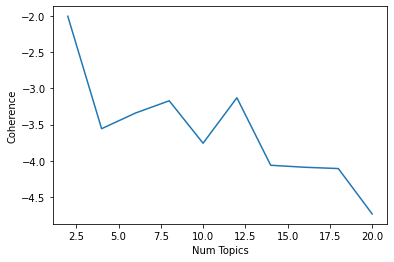

In [75]:
ntopics = [2,4,6,8,10,12,14,16,18,20]
plt.plot(ntopics, coherencesT)
plt.xlabel("Num Topics")
plt.ylabel("Coherence")
plt.show()

10개의 토픽을 이용하는 것이 가장 적합함을 알 수 있다.

In [76]:
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                           num_topics = NUM_TOPICS,
                                           id2word = dictionary,
                                           passes = 30)

topics = ldamodel.print_topics(num_words = 10)

In [77]:
topics

[(0,
  '0.050*"to" + 0.025*"you" + 0.022*"your" + 0.015*"call" + 0.014*"stop" + 0.013*"on" + 0.012*"for" + 0.012*"the" + 0.012*"mobile" + 0.012*"claim"'),
 (1,
  '0.022*"call" + 0.020*"to" + 0.018*"now" + 0.017*"is" + 0.016*"the" + 0.015*"your" + 0.011*"claim" + 0.010*"for" + 0.010*"stop" + 0.010*"just"'),
 (2,
  '0.051*"to" + 0.021*"cash" + 0.017*"now" + 0.016*"in" + 0.015*"or" + 0.014*"you" + 0.012*"txt" + 0.012*"150p" + 0.011*"chat" + 0.011*"å£1000"'),
 (3,
  '0.044*"to" + 0.031*"free" + 0.018*"for" + 0.017*"reply" + 0.017*"tone" + 0.017*"call" + 0.015*"ur" + 0.015*"week" + 0.014*"or" + 0.012*"txt"'),
 (4,
  '0.031*"for" + 0.022*"your" + 0.020*"call" + 0.016*"account" + 0.015*"expires" + 0.014*"identifier" + 0.014*"points" + 0.014*"private" + 0.014*"statement" + 0.013*"shows"'),
 (5,
  '0.043*"call" + 0.036*"you" + 0.020*"is" + 0.020*"have" + 0.018*"to" + 0.017*"now" + 0.015*"your" + 0.013*"urgent" + 0.013*"won" + 0.012*"prize"'),
 (6,
  '0.022*"call" + 0.021*"or" + 0.017*"your" + 0

In [78]:
! pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c5c3d4ed6da0844eaf68f721f9ae25c31cd0055504015f52c57c1aea81053936
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=17c13f8cf5086f04d680e63504e46657dc132eb1fef0e27e502103f71ac5a0cc
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [79]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


* 왼쪽에 치우쳐져있을수록 cash, prize 등 금전적인 토픽에 가깝다.
* free와 call은 전체적인 토픽에 걸쳐 전반적으로 많이 나오는 단어임을 알 수 있다.'
* 아래쪽으로 치우쳐져 있을수록 lastest, new, now 등의 단어 빈도가 증가한다. (최신 제품을 홍보하는 내용일 것으로 예상)
* 왼쪽 위의 토픽은 urgent와 landline이 동시에 자주 등장하는 것으로 보아 긴급 전화를 사칭한 내용일 것으로 예상된다.

금전적인 토픽, 신제품 홍보 토픽, 긴급전화 토픽 등의 스팸메일이 존재하는 것으로 확인할 수 있다.